In [213]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re
import yfinance as yf

In [3]:
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as analyzer

In [4]:
df = pd.read_csv('wallstreetbets_2022.csv')
df = df.drop(labels=['title','score','id','url'], axis=1)
df

/var/folders/7s/2w2_z_vj0z5gyn67qs_646th0000gn/T/ipykernel_31480/3953625616.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('wallstreetbets_2022.csv')


,comms_num,created,body,timestamp
0,8.0,1.649236e+09,Hi guys I bought uvxy beginning of the year in...,2022-04-06 09:14:16
1,0.0,1.649238e+09,Yes December 30 I sold it,2022-04-06 09:32:46
2,0.0,1.649237e+09,![img](emote|t5_2th52|4260) Just need help,2022-04-06 09:15:56
3,0.0,1.649233e+09,??? Alright bro.,2022-04-06 08:10:16
4,0.0,1.649233e+09,Elon is with more than some of the S&P 500 com...,2022-04-06 08:10:03
...,...,...,...,...
249445,0.0,1.668914e+09,me too but it's sort of an aesthetic,2022-11-20 03:07:04
249446,0.0,1.668914e+09,You wanna be in a clique bro?,2022-11-20 03:06:59
249447,0.0,1.668914e+09,Don’t forget trump,2022-11-20 03:06:59
249448,0.0,1.668914e+09,To be fair the people buying into this shit ar...,2022-11-20 03:06:57


In [5]:
comments = list(df['body'])

In [6]:
score_list = []
s  = analyzer()
def sentiment():       
    for i in comments:
        result = re.sub(r"http\S+", "", str(i))
        sentiment = s.polarity_scores(result)
        score_list.append(sentiment)
    return score_list

In [7]:
score_list = sentiment()
score_list

[{'neg': 0.065, 'neu': 0.823, 'pos': 0.112, 'compound': 0.5106},
 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.4574},
 {'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.3695},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.267, 'pos': 0.733, 'compound': 0.6705},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.296},
 {'neg': 0.263, 'neu': 0.426, 'pos': 0.312, 'compound': 0.1759},
 {'neg': 0.271, 'neu': 0.35, 'pos': 0.379, 'compound': 0.6907},
 {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.3919},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.3182},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.

In [8]:
df1 = pd.DataFrame(score_list)
df1 = df1.drop(['neg','neu','pos'], axis=1)

In [9]:
result = pd.concat([df, df1], axis=1).reindex(df.index)
result

,comms_num,created,body,timestamp,compound
0,8.0,1.649236e+09,Hi guys I bought uvxy beginning of the year in...,2022-04-06 09:14:16,0.5106
1,0.0,1.649238e+09,Yes December 30 I sold it,2022-04-06 09:32:46,0.4019
2,0.0,1.649237e+09,![img](emote|t5_2th52|4260) Just need help,2022-04-06 09:15:56,0.4574
3,0.0,1.649233e+09,??? Alright bro.,2022-04-06 08:10:16,0.3695
4,0.0,1.649233e+09,Elon is with more than some of the S&P 500 com...,2022-04-06 08:10:03,0.0000
...,...,...,...,...,...
249445,0.0,1.668914e+09,me too but it's sort of an aesthetic,2022-11-20 03:07:04,0.0000
249446,0.0,1.668914e+09,You wanna be in a clique bro?,2022-11-20 03:06:59,0.0000
249447,0.0,1.668914e+09,Don’t forget trump,2022-11-20 03:06:59,-0.2263
249448,0.0,1.668914e+09,To be fair the people buying into this shit ar...,2022-11-20 03:06:57,-0.8791


In [221]:
comments = result['body']
comments.to_csv('historical_comments.csv')

In [79]:
result = result.sort_values(by=['timestamp'])
result = result.dropna()
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226088 entries, 443 to 248488
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   comms_num  226088 non-null  float64
 1   created    226088 non-null  float64
 2   body       226088 non-null  object 
 3   timestamp  226088 non-null  object 
 4   compound   226088 non-null  float64
dtypes: float64(3), object(2)
memory usage: 10.3+ MB


In [80]:
result = result.dropna()
result_small =  result.drop(['body','created','comms_num'], axis=1)
result_small['timestamp'] = pd.to_datetime(result_small['timestamp'])

In [81]:
result_small.reset_index()

,index,timestamp,compound
0,443,2022-03-27 15:34:01,-0.2056
1,441,2022-03-27 15:45:28,-0.7764
2,436,2022-03-27 20:00:10,-0.6249
3,434,2022-03-27 21:14:03,-0.7387
4,431,2022-03-27 22:01:39,-0.2500
...,...,...,...
226083,248492,2022-11-20 03:39:09,0.0000
226084,248491,2022-11-20 03:39:17,0.0000
226085,248490,2022-11-20 03:39:23,0.0000
226086,248489,2022-11-20 03:39:29,0.9793


In [82]:
result_small = result_small.set_index(pd.DatetimeIndex(result_small['timestamp']))

In [83]:
result_small.drop('timestamp',axis=1)

,compound
timestamp,
2022-03-27 15:34:01,-0.2056
2022-03-27 15:45:28,-0.7764
2022-03-27 20:00:10,-0.6249
2022-03-27 21:14:03,-0.7387
2022-03-27 22:01:39,-0.2500
...,...
2022-11-20 03:39:09,0.0000
2022-11-20 03:39:17,0.0000
2022-11-20 03:39:23,0.0000


In [84]:
result1 = result_small.resample('D').mean()

In [85]:
result1.index = pd.to_datetime(result1.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')

<AxesSubplot:xlabel='timestamp'>

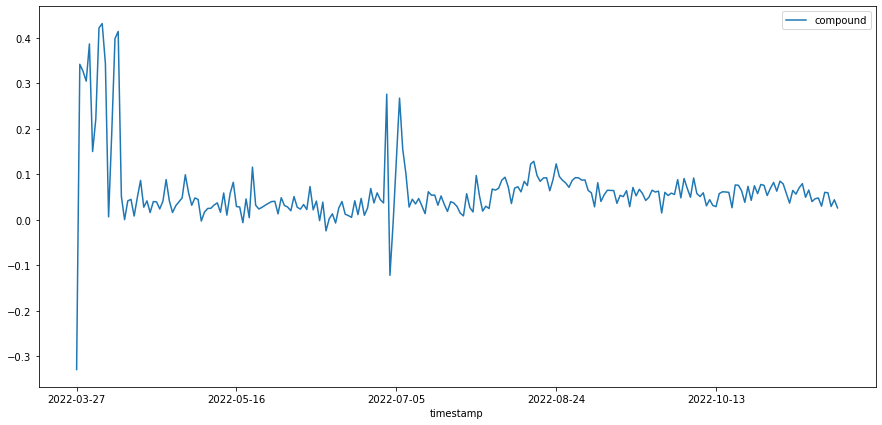

In [86]:
result1.plot(figsize=(15,7))

In [102]:
spy = yf.Ticker('SPY')

In [103]:
hist = spy.history(period="1y")

<AxesSubplot:xlabel='Date'>

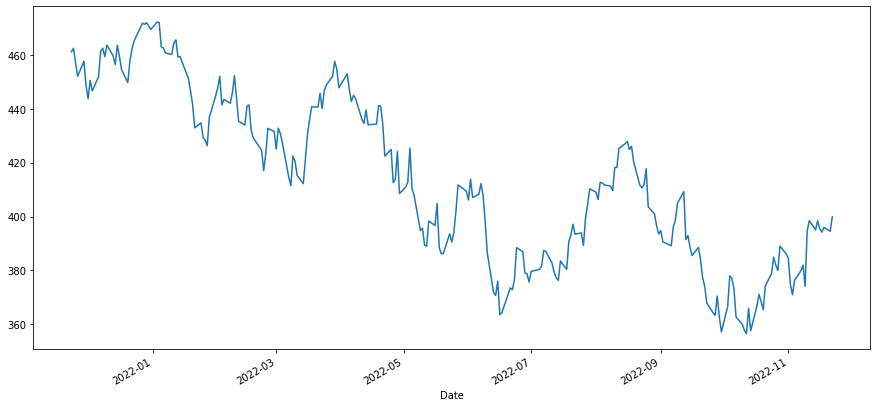

In [104]:
hist['Close'].plot(figsize=(15,7))

In [105]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-23 00:00:00-05:00,460.255426,462.107407,457.526728,461.210968,73206500,0.0,0
2021-11-24 00:00:00-05:00,459.112640,462.570328,458.255614,462.442261,61858800,0.0,0
2021-11-26 00:00:00-05:00,455.448117,456.984861,450.946233,452.128357,112669600,0.0,0
2021-11-29 00:00:00-05:00,457.152371,459.605244,454.847255,457.674469,86268800,0.0,0
2021-11-30 00:00:00-05:00,455.113200,457.112939,448.513062,448.769196,148559600,0.0,0
...,...,...,...,...,...,...,...
2022-11-16 00:00:00-05:00,396.779999,397.779999,394.790009,395.450012,68508500,0.0,0
2022-11-17 00:00:00-05:00,390.459991,394.950012,390.140015,394.239990,74496300,0.0,0
2022-11-18 00:00:00-05:00,397.739990,397.809998,393.040009,396.029999,92783500,0.0,0


In [106]:
hist.index = pd.to_datetime(hist.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')

In [107]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-23,460.255426,462.107407,457.526728,461.210968,73206500,0.0,0
2021-11-24,459.112640,462.570328,458.255614,462.442261,61858800,0.0,0
2021-11-26,455.448117,456.984861,450.946233,452.128357,112669600,0.0,0
2021-11-29,457.152371,459.605244,454.847255,457.674469,86268800,0.0,0
2021-11-30,455.113200,457.112939,448.513062,448.769196,148559600,0.0,0
...,...,...,...,...,...,...,...
2022-11-16,396.779999,397.779999,394.790009,395.450012,68508500,0.0,0
2022-11-17,390.459991,394.950012,390.140015,394.239990,74496300,0.0,0
2022-11-18,397.739990,397.809998,393.040009,396.029999,92783500,0.0,0


In [108]:
result2 = result1.join(hist, how="left")

In [109]:
result2['compound amplified'] = result2['compound']

In [110]:
result2 = result2.dropna()

In [111]:
result2

,compound,Open,High,Low,Close,Volume,Dividends,Stock Splits,compound amplified
timestamp,,,,,,,,,
2022-03-28,0.341352,448.274186,452.091949,446.290935,452.091949,68529800.0,0.0,0.0,0.341352
2022-03-29,0.326200,456.167507,458.200357,453.351294,457.684692,86581500.0,0.0,0.0,0.326200
2022-03-30,0.304307,456.484862,457.337676,452.647276,454.858612,79666900.0,0.0,0.0,0.304307
2022-03-31,0.386045,454.055386,454.918095,447.381736,447.857727,121699900.0,0.0,0.0,0.386045
2022-04-01,0.149641,449.513732,449.662470,445.378671,449.127014,89048800.0,0.0,0.0,0.149641
...,...,...,...,...,...,...,...,...,...
2022-11-14,0.047651,396.660004,400.179993,394.829987,395.119995,71903500.0,0.0,0.0,0.047651
2022-11-15,0.029676,401.149994,402.309998,394.489990,398.489990,93194500.0,0.0,0.0,0.029676
2022-11-16,0.060044,396.779999,397.779999,394.790009,395.450012,68508500.0,0.0,0.0,0.060044


In [112]:
a=list(result2['Close'].pct_change())

In [113]:
result2['S&P 500 return %*'] = a

In [114]:
result2

,compound,Open,High,Low,Close,Volume,Dividends,Stock Splits,compound amplified,S&P 500 return %*
timestamp,,,,,,,,,,
2022-03-28,0.341352,448.274186,452.091949,446.290935,452.091949,68529800.0,0.0,0.0,0.341352,NaN
2022-03-29,0.326200,456.167507,458.200357,453.351294,457.684692,86581500.0,0.0,0.0,0.326200,0.012371
2022-03-30,0.304307,456.484862,457.337676,452.647276,454.858612,79666900.0,0.0,0.0,0.304307,-0.006175
2022-03-31,0.386045,454.055386,454.918095,447.381736,447.857727,121699900.0,0.0,0.0,0.386045,-0.015391
2022-04-01,0.149641,449.513732,449.662470,445.378671,449.127014,89048800.0,0.0,0.0,0.149641,0.002834
...,...,...,...,...,...,...,...,...,...,...
2022-11-14,0.047651,396.660004,400.179993,394.829987,395.119995,71903500.0,0.0,0.0,0.047651,-0.008507
2022-11-15,0.029676,401.149994,402.309998,394.489990,398.489990,93194500.0,0.0,0.0,0.029676,0.008529
2022-11-16,0.060044,396.779999,397.779999,394.790009,395.450012,68508500.0,0.0,0.0,0.060044,-0.007629


In [115]:
result3 = result2[(result2.index > "2022-05-01")]

In [116]:
result3

,compound,Open,High,Low,Close,Volume,Dividends,Stock Splits,compound amplified,S&P 500 return %*
timestamp,,,,,,,,,,
2022-05-02,0.031656,408.619090,412.436854,401.628113,411.008911,158312500.0,0.0,0.0,0.031656,0.006019
2022-05-03,0.047764,411.534483,415.421638,409.898277,412.893005,100028200.0,0.0,0.0,0.047764,0.004584
2022-05-04,0.044386,413.587143,426.061809,410.245370,425.466827,144247900.0,0.0,0.0,0.044386,0.030453
2022-05-05,-0.003016,420.994560,421.440804,406.011115,410.344513,172929100.0,0.0,0.0,-0.003016,-0.035543
2022-05-06,0.016705,407.657222,411.326218,402.332198,407.895203,151770800.0,0.0,0.0,0.016705,-0.005969
...,...,...,...,...,...,...,...,...,...,...
2022-11-14,0.047651,396.660004,400.179993,394.829987,395.119995,71903500.0,0.0,0.0,0.047651,-0.008507
2022-11-15,0.029676,401.149994,402.309998,394.489990,398.489990,93194500.0,0.0,0.0,0.029676,0.008529
2022-11-16,0.060044,396.779999,397.779999,394.790009,395.450012,68508500.0,0.0,0.0,0.060044,-0.007629


In [204]:
result4 = result.sort_values(by='compound', ascending=False)
result4.reset_index(inplace=True, drop=True)
result4.body[1]

'[“Those who do not understand the true pain of a “Bear market can never understand the true peace that exists within a “Bull Market”](https://preview.redd.it/ay3lmcyycfm91.jpg?width=1280&format=pjpg&auto=webp&s=be02c434e8bdefe2a3a16e844aa07ce06406ecec)\n\n&#x200B;\n\n**Disclaimer :**\n\n&#x200B;\n\n>*"I really really really wanna apologize to you all guys because i was suppose to send this newsletter first thing on Monday. But unfortunately i got caught up in the Chess drama that is taking place in the Sinquefield cup 2022"*\n\n&#x200B;\n\nSo moving on...\n\n&#x200B;\n\n* This post is not about making lambo profits in a day but instead what we do here is we come with unthinkable tactical trading styles like what we do in chess that will help us navigate this  “Stagflationary” and then later on  “Forgotten Depressionary” stock market. Yes guys our situation is that messed up. \n* Also you’re advised to “Do your own research” and not to take this post seriously to a point that you sell 

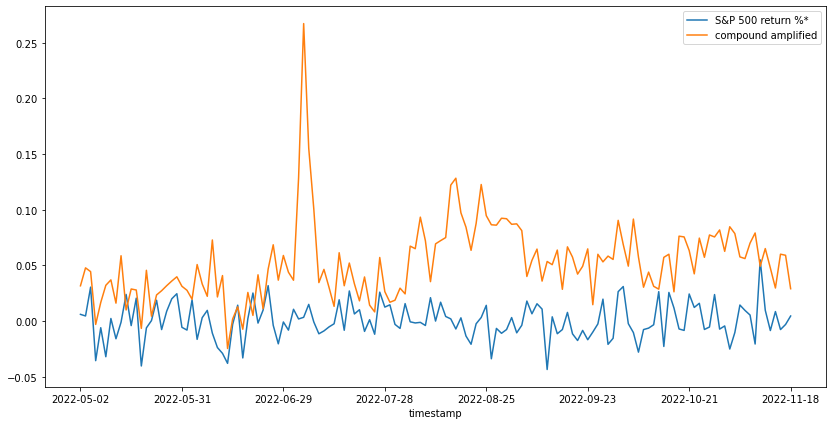

In [208]:
fig = result3[['S&P 500 return %*', 'compound amplified', ]].plot(figsize=(14, 7));
plt.savefig("EDA_corr.jpg")

The Pearson correlation measures the strength of the linear relationship between two variables. It is the ratio between the covariance of two variables and the product of their standard deviations

In [206]:
x_ = np.array(result3['S&P 500 return %*'])
y_ = np.array(result3['compound amplified'])

Pearson_correlation = pd.DataFrame(np.corrcoef(x_simple, y_simple))
Pearson

,0,1
0,1.000000,0.054229
1,0.054229,1.000000


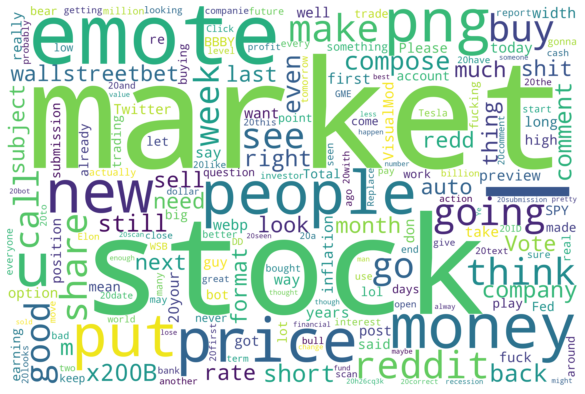

In [220]:
#The Complete Code
#Importing Libraries
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

STOP = tuple(STOPWORDS)
extra = ('https','t5_2th52','will','s','message','img', 't','day','now','time', 'year','one', ' people', 'know')
stop = STOP + extra
stop = set(stop)


#Creating the text variable
text = " ".join(cat for cat in result.body)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, width=3000,
        height=2000,background_color = 'white', stopwords=stop).generate(text)
# Display the generated Word Cloud
plt.figure(figsize=(15,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.jpg")
plt.show()

In [222]:
df_m = pd.read_csv('df2.csv')

In [227]:
a=list(df_m['Ticker'])

In [ ]:
b=" "
for i in a:
    b += " "+str(i)
b

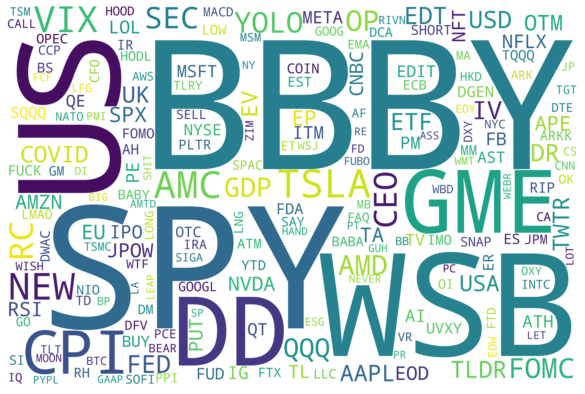

In [239]:
#The Complete Code
#Importing Libraries
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

STOP = tuple(STOPWORDS)
extra = ('https','t5_2th52','will','s','message','img', 't','day','now','time', 'year','one', ' people', 'know')
stop = STOP + extra
stop = set(stop)


#Creating the text variable
text = b
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, width=3000,
        height=2000,background_color = 'white', stopwords=stop).generate(text)
# Display the generated Word Cloud
plt.figure(figsize=(15,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.jpg")
plt.show()

In [240]:
df_n = pd.read_csv('validList_historical.csv')

In [245]:
a = list(df_n['0'])

In [ ]:
b=" "
for i in a:
    b += " "+str(i)
b

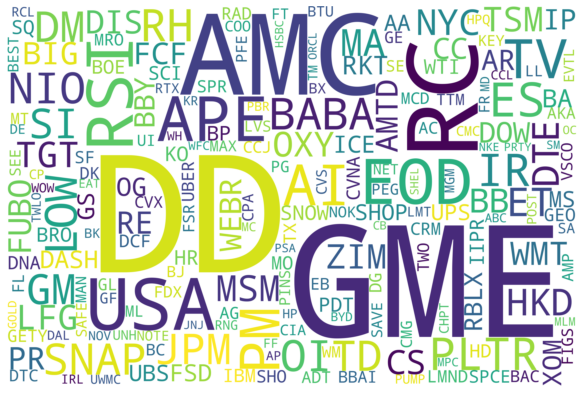

In [248]:
#The Complete Code
#Importing Libraries
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

STOP = tuple(STOPWORDS)
extra = ('https','t5_2th52','will','s','message','img', 't','day','now','time', 'year','one', ' people', 'know')
stop = STOP + extra
stop = set(stop)


#Creating the text variable
text = b
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, width=3000,
        height=2000,background_color = 'white', stopwords=stop).generate(text)
# Display the generated Word Cloud
plt.figure(figsize=(15,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.jpg")
plt.show()